In [1]:
%autosave 0

import os
from rich.jupyter import print
from dharpa_toolbox.modules.utils import list_available_module_names, describe_module, print_module_desc, load_workflows, create_module, create_workflow
from dharpa_toolbox.utils import print_file_content, graph_to_image
from dharpa_toolbox.modules.workflows import DharpaWorkflow
from dharpa_toolbox.rendering.jupyter.renderer import PlainJupyterWorkflowRenderer, ModuleJupyterWorkflowRenderer

base_path = os.path.abspath(".")


Autosave disabled


## What's a workflow?

- a workflow is a tool to transform data into more structured data
  - 'more data' -- we'll create what can be considered 'new' data out of the existing set
  - 'better structured' -- improve (and replace) the current structure (fix errors, etc.)
  - 'more structure' -- augment existing data with additional structure
  - secondary outcomes (insight, new research questions, etc...)
- workflows are 'just' simple scripts
  - no or only very minimal control structures, except from input/output connections
  - low computational complexity for the workflow itself
  - high(er) computational complexity within modules (but hidden from workflow creator)


## Workflows in our context

- workflow creators and workflow users are different, distinct roles
- Jupyter is a very good tool to create non-trivial exploratory workflows
- there's a difference between 'dynamic' workflows, and 'static' ones
- Jupyter is usually used to create workflows in a 'dynamic' way
- more 'data engineering' than 'data science'
- interactivity:
   - not an issue in 'data engineering'
   - not very well supported in Jupyter (cell-based approach not useful for us)


## Two options: monolithic & modular

### Monolithic

 - complexity spread out across the workflow
 - well integrated, no restrictions UI-wise

### Modular

 - complexity concentrated in the framework, but simple modules
 - some restrictions on the UI

- no difference in how to handle data, metadata
- backend modules don't necessarily map onto frontend modules
- suggested approach:
  - 100% modular backend
  - modular frontend, incl. optional monolithic frontend approach for high-value workflows

Notes:

 - only important for the workflow part, there will be features that won't be affected by this at all (metadata, data)

### Definitions

- ***module***:
   - a module is an atomic entity that contains a fixed set of defined inputs and outputs,
   - as well as a processing unit that converts the set of inputs to outputs, in a predicable way

- ***workflow***:
   - a workflow contains a set of modules which are connected in a specific way
   - a workflow is conceptually also a module, because it also contains a set of inputs/outputs as well as processing unit
   - it can be used in other, 'parent' workflows in the same ways a normal module can.


## Modelling workflows

- research data is more useful when it's structured, so why would workflow definitions be different?
- so: can we model a workflow as data?

Notes:

- monolithic workflows are not structured (comparison:

## Advantages

 - scalability
 - disposible middleware and frontends (only important to be able to use the created workflows)


# Examples

In [2]:
# we can list all available modules (and workflows)
list_available_module_names()

['dharpa_workflow',
 'file_reader',
 'lowercase_corpus',
 'remove_stopwords_from_corpus',
 'tokenize_corpus']

In [3]:
# we can investigate each modules inputs and output specs
print_module_desc('tokenize_corpus')

In [4]:
# a workflow configuration is basically just a list of modules, incl. their input/output connections
workflow_config = f'{base_path}/workflows/corpus_processing_simple.yaml'
print_file_content(workflow_config)

```yaml
---
modules:

- type: tokenize_corpus

- type: lowercase_corpus
  input_map:
    tokenized_text: tokenize_corpus.tokenized_text

- type: remove_stopwords_from_corpus
  input_map:
    tokenized_text: lowercase_corpus.tokenized_text
  workflow_outputs:
    tokenized_text: processed_text_corpus
```

In [5]:
# we create a 'workflow' object using the configuration data
workflow = DharpaWorkflow.from_file(workflow_config)
# we can investigate each workflows available input and output names
print(workflow.input_names)

In [6]:
print(workflow.output_names)

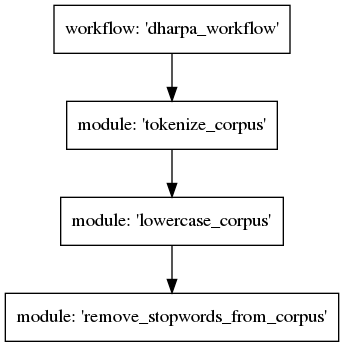

In [7]:
# we can display the execution and data-flow structures of a workflow graphically
graph_to_image(workflow.execution_graph)
# graph_to_image(workflow.data_flow_graph)

In [8]:
text_map = {
    "1": "Hello World!",
    "2": "Hello DHARPA!"
}
stopwords = [
    "hello",
    "!"
]

workflow = DharpaWorkflow.from_file(workflow_config)

workflow.set_input("tokenize_corpus__text_map", text_map)
workflow.set_input("lowercase_corpus__enabled", True)
workflow.set_input("remove_stopwords_from_corpus__enabled", True)
workflow.set_input("remove_stopwords_from_corpus__stopwords_list", stopwords)

# the workflow state is processed automatically, so we can always query the current output
output1 = workflow.get_output("processed_text_corpus")
print(output1)

In [9]:
# text_map: {"one": "Hello World!", "two": "Hello DHARPA!"}
# stopword_list: hello

workflow = DharpaWorkflow.from_file(workflow_config)
renderer = PlainJupyterWorkflowRenderer(workflow=workflow)
renderer.render()

GridspecLayout(children=(Label(value='tokenize_corpus__text_map', layout=Layout(grid_area='widget001')), Texta…

Output()

In [10]:
# we can load workflows from json/yaml files on the file-system, and convert them to Python classes
load_workflows(f"{base_path}/workflows")
print(list_available_module_names())

In [11]:
# display the module spec for the 'input_files_processing' workflow
print_module_desc("input_files_processing")

In [12]:
# create the workflow object
ifp_workflow = create_workflow('input_files_processing')
# display the internal structure of the workflow
print(ifp_workflow._workflow_config)

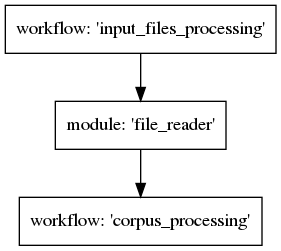

In [13]:
# display the execution graph for the workflow
graph_to_image(ifp_workflow.execution_graph)
# graph_to_image(ifp_workflow.data_flow_graph)

In [14]:
# auto-render input and output-widgets for the workflow (only works when executed in Jupyter)
renderer = PlainJupyterWorkflowRenderer(workflow=ifp_workflow)
renderer.render()

GridspecLayout(children=(Label(value='files', layout=Layout(grid_area='widget001')), FileUpload(value={}, desc…

Output()